In [49]:
import pandas as pd
import numpy as np

### Preparing the dataset

In [50]:
data = pd.read_csv('jamb_exam_results.csv')
df = pd.DataFrame(data)
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head()


,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [51]:
del df['student_id']

In [52]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [53]:
df.fillna(0, inplace=True)
df.isnull().sum()


jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']


In [56]:
from sklearn.feature_extraction import DictVectorizer

In [57]:
dv = DictVectorizer(sparse=False)

In [58]:
from sklearn.tree import DecisionTreeRegressor

### Question 1
Which feature is used for splitting the data?

In [59]:
dt = DecisionTreeRegressor(max_depth=1)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [60]:
feature_names = dv.get_feature_names_out()
feature_names

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [61]:
split_feature_index = dt.tree_.feature[0]
split_feature_name = feature_names[split_feature_index]
split_feature_name


'study_hours_per_week'

### Question 2

What's the RMSE of this model on the validation data?

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

rf.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = rf.predict(X_val)

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
y_pred = rf.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mse

1775.5471699999998

In [66]:
rmse = np.sqrt(mse)
rmse


42.13724207871227

### Question 3
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

In [67]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    scores.append((n, rmse))
    print(f"n_estimators: {n}, RMSE: {rmse:.3f}")

n_estimators: 10, RMSE: 42.137
n_estimators: 20, RMSE: 41.461
n_estimators: 30, RMSE: 41.106
n_estimators: 40, RMSE: 40.917
n_estimators: 50, RMSE: 40.852
n_estimators: 60, RMSE: 40.784
n_estimators: 70, RMSE: 40.677
n_estimators: 80, RMSE: 40.539
n_estimators: 90, RMSE: 40.504
n_estimators: 100, RMSE: 40.517
n_estimators: 110, RMSE: 40.593
n_estimators: 120, RMSE: 40.625
n_estimators: 130, RMSE: 40.651
n_estimators: 140, RMSE: 40.595
n_estimators: 150, RMSE: 40.597
n_estimators: 160, RMSE: 40.604
n_estimators: 170, RMSE: 40.628
n_estimators: 180, RMSE: 40.641
n_estimators: 190, RMSE: 40.631
n_estimators: 200, RMSE: 40.601


### Question 4
What's the best max_depth, using the mean RMSE?

In [68]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        scores.append((d, n, rmse))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])
df_scores

,max_depth,n_estimators,rmse
0,10,10,41.258349
1,10,20,40.880528
2,10,30,40.624956
3,10,40,40.270069
4,10,50,40.317006
...,...,...,...
75,25,160,40.600208
76,25,170,40.624371
77,25,180,40.638564
78,25,190,40.628661


In [69]:
import matplotlib.pyplot as plt

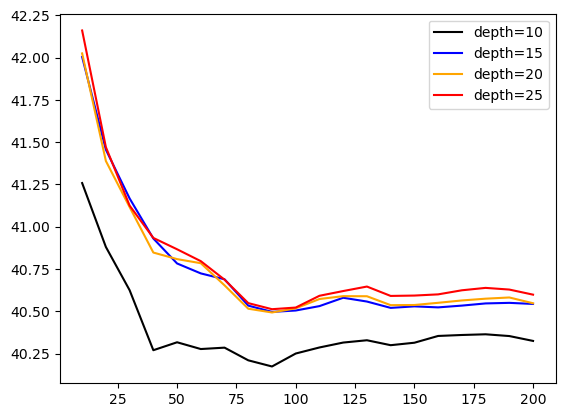

In [70]:
colors = ['black', 'blue', 'orange', 'red']
depth_values = [10, 15, 20, 25]

for s, col in zip(depth_values, colors):
    df_subset = df_scores[df_scores.max_depth == s]
    plt.plot(df_subset.n_estimators, df_subset.rmse, 
             color=col,
             label='depth=%d' % s)
plt.legend()

In [71]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

### Question 5

What's the most important feature (among these 4)?

- study_hours_per_week
- attendance_rate
- distance_to_school
- teacher_quality

In [72]:
importance = rf.feature_importances_
importance


array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [73]:
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df

,feature,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


### Question 6

Which eta leads to the best RMSE score on the validation dataset?

In [74]:
import xgboost as xgb

In [79]:
features = dv.get_feature_names_out().tolist()

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [80]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [112]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)    

    return df_results

In [124]:
scores = {}

In [127]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [128]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [129]:
scores.keys()

dict_keys(['eta=0.1', 'eta=0.3'])

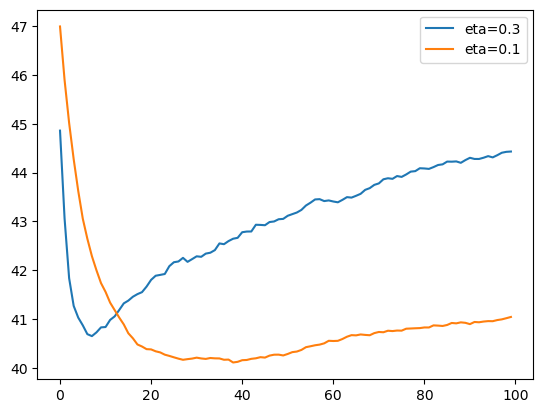

In [131]:
etas = ['eta=0.3', 'eta=0.1']

for eta in etas: 
    df_scores = scores[eta]
    plt.plot(df_scores.num_iter, df_scores.val_rmse, label=eta)
plt.legend()

In [132]:
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

44.432098039002526